# Algoritmo de NLP

<p> Um algoritmo de Processamento de Linguagem Natural (NLP) é um conjunto de instruções computacionais projetadas para lidar com texto e linguagem humana de maneira automatizada. Ele é desenvolvido para entender, interpretar, analisar ou gerar linguagem natural, permitindo que computadores possam interagir com dados textuais de maneira similar a como os seres humanos o fazem. </p>
<p>Na finalidade do nosso projeto, ele tem o objetivo de entender a intenção do usuário em seu pedido para que ele consiga rastrear exatamente o que ele deseja no PDF que foi feito o upload. Como benefícios, trazemos a melhor experiência no prompt de comando e a eficiência nas respostas.
</p>
<p> Para fazer esse algoritmo, usamos bibliotecas como spacy e nltk, que oferecem uma ampla gama de recursos para lidar com tarefas relacionadas a NLP. Além de sklearn para análise de similaridade de cosseno e numpy e matplotlib para visualizar gráficos.</p>
<br>
<p> Durante todo o notebook será feitos passo a passo um algoritmo NLP, passando por processos como tokenização, stopwords, lemmatização e similaridade de cossenos. </p>

## Setup

Importação da biblioteca Spacy

In [ ]:
import spacy

In [ ]:
spacy.cli.download('pt_core_news_lg')

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


Importação da biblioteca nltk, punkt e stopwords

In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importação de Matriz de Similaridade e outras métricas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Textos utilizados para a base

In [ ]:
texto = """
51% dos executivos de dados do Brasil apostam em IA, diz estudo da IBM
O levantamento mostra que apesar da presença da IA no dia a dia das companhias, ela ainda não é usada amplamente para automatizar as tomadas de decisões
A pesquisa "CDO Study 2023", que consulta executivos nos cargos de Chief Data Officers (CDOs) nos principais mercados da IBM, revelou que mais da metade (51%) dos CDOs brasileiros está utilizando inteligência artificial e dados para tomar decisões melhores e mais rápidas.

No entanto, apenas 22% desses profissionais estão usando IA para automatizar a tomada de decisões. A pesquisa também destacou que 48% dos CDOs brasileiros alinham sua estratégia de gerenciamento de dados com a transformação digital das empresas.
O CDO é um cargo criado para ser um agente de mudança nas empresas, com o objetivo de capacitar e divulgar o valor dos dados para as organizações.
Esses profissionais não só precisam entender as necessidades estratégicas do negócio mas também implementar um planejamento de dados para ajudar os líderes a alcançar objetivos mais rapidamente e utilizar os dados como uma vantagem competitiva.

A pesquisa também revelou que os executivos de dados brasileiros consideram a Internet das Coisas (60%), Nuvem Híbrida (48%) e IA e Machine Learning (33%) como as melhores tecnologias capazes de revelar o valor dos dados.

O estudo foi realizado com 3 mil CDOs em todo o mundo, incluindo países da América Latina, como México, Chile e Colômbia. """

In [ ]:
texto2 = """
IBM (IBMB34) tem alta de 15% na receita do 3T22 e supera previsões
A gigante informática registrou alta nos resultados de todos seus segmentos de atuação
IBM (IBMB34) teve alta nos resultados de cada segmento de negócios
A receita de consultoria chegou a US$ 4,70 bilhões, um aumento de 5,5% e acima do consenso do mercado de US$ 4,51 bilhões. As margens antes dos impostos na unidade de consultoria diminuíram de 10,5% para 9,8%. A inflação contínua dos custos trabalhistas pesou no lucro da unidade.

O segmento de infraestrutura teve uma receita de US$ 3,35 bilhões, um aumento de 14,8% e superior ao consenso de US$ 3,06 bilhões. A receita da linha de computadores mainframe z Systems da IBM aumentou 88%. As vendas do computador mainframe z16 começaram no segundo trimestre .
Tanto o crescimento de nossa receita quanto o perfil de lucro operacional nos três primeiros trimestres do ano se alinham à tese de investimento que descrevemos no outono passado. Nosso mix de portfólio, fundamentos de negócios, forte fluxo de receita recorrente e sólida geração de caixa nos permitem investir para crescimento contínuo e retorno de valor aos acionistas por meio de dividendos", salientou James Kavanaugh, CFO da IBM.

Durante o trimestre, a IBM anunciou a aquisição da empresa de consultoria Dialexa e da startup de software de observabilidade Databand.ai , juntamente com novos servidores contendo seus chips Power10.

O mercado gostou dos resultados da IBM, e as ações da gigante sobem mais de 3% nas negociações pós-mercado na Bolsa de Valores de Nova York (NYSE). Desde o começo do ano, as ações da IBM caíram 8%, enquanto o índice de ações S&P 500 caiu quase 23% no mesmo período."""

In [ ]:
texto3 = """IBM planeja formar 30 milhões de profissionais no setor tech até 2030
Empresa quer ajudar a formar profissionais que terão as habilidades "necessárias para o trabalho do amanhã"
A gigante de tecnologia IBM divulgou nesta quarta-feira, 13, uma iniciativa global para capacitar 30 milhões de pessoas com as habilidades que serão "necessárias para o trabalho do amanhã".

Serão 170 parceiros acadêmicos em mais de 30 países que contribuirão por meio de programas de ensino e plataformas de desenvolvimento profissional. Alguns dos exemplos no Brasil são a prefeitura de Santa Maria, no município do Rio Grande do Sul; e o Centro Paula Souza, no Estado de São Paulo, que estão atuando junto à IBM em modelos inovadores de educação.
“Nosso objetivo aqui no Brasil é criar uma rede de oportunidades educacionais com amplo alcance e impacto no País. Temos um compromisso de longa data com a democratização da educação e da tecnologia, pois acreditamos que a inclusão é o melhor caminho para obtermos um crescimento social e econômico sustentado e justo para toda a sociedade, criando espaços para as pessoas e levando inovação para as empresas”, afirma Katia Vaskys, CEO da IBM Brasil.
Além do Brasil, as iniciativas da IBM visam estratégias para desenvolvimento de força de trabalho nos EUA, Índia, Japão, Nigéria, Suécia, Hong Kong e outros países da América Latina.

A empresa cita dados do Fórum Econômico Mundial de que reduzir o vão de habilidades globais poderia adicionar 11,5 trilhões de dólares à economia mundial até 2028."""

In [ ]:
texto4 = """IBM, USP e Fapesp inauguram centro de inteligência artificial no Brasil
Projeto irá se dedicar, inicialmente, a projetos relacionados com saúde, meio ambiente, cadeia de produção de alimentos e futuro do trabalho.
IBM, Universidade de São Paulo (USP) e Fapesp (Fundação de Amparo à Pesquisa do Estado de São Paulo) iniciaram nesta terça-feira (13) as atividades de um centro de inteligência artificial no Brasil.

O espaço vai se dedicar ao desenvolvimento de pesquisas relacionadas a temas como saúde, meio ambiente, cadeia de produção de alimentos, futuro do trabalho e no desenvolvimento de tecnologias que possibilitam a interação com máquinas usando fala ou escrita em português.
Ele terá uma segunda unidade destinada a capacitar estudantes e profissionais, no Instituto de Ciências Matemáticas e da Computação (ICMC), no campus da USP em São Carlos.

Com financiamento de até 10 anos, a IBM e Fapesp irão reservar, cada uma, até R$ 2 milhões anualmente para implementar os programas do C4AI. A USP investirá pelo menos R$ 4 milhões por ano em instalações físicas, laboratórios, professores, técnicos e administradores para gerir a iniciativa.

Mais de 60 pesquisadores de 14 unidades de ensino e pesquisa da USP estarão envolvidos nos estudos.

A maioria dos resultados da pesquisa do C4AI, incluindo dados e códigos, será disponibilizado em um modelo de código aberto, o que permitirá seu uso por outras empresas, de acordo com Ana Paula Assis, Gerente Geral da IBM América Latina.

"O acordo prevê que a propriedade intelectual criada conjuntamente por USP e IBM seja co-propriedade de ambas, incluindo invenções e código, mas a intenção é disponibilizar o máximo possível através de inovação aberta para beneficiar o constante desenvolvimento do ecossistema de inovação do país", disse Ana Paula Assis ao G1.
As áreas de pesquisa
Neste início, o centro irá trabalhar em cinco temas:

cadeia de produção de alimentos, com foco especial a de pequenos produtores para resolver questões como desperdício de água e alimento;
saúde, com o objetivo de melhorar o diagnóstico, o tratamento e a reabilitação de pacientes de acidente vascular cerebral (AVC) e investigar formas de melhorar a escolha de protocolos de reabilitação em casos de AVC;
políticas públicas e o futuro do trabalho, com coleta de dados para uma análise sobre impacto da inteligência artificial nos empregos e no futuro do trabalho;
interação com máquinas em português, com ferramentas e dados para treinar sistemas de diálogo no idioma para aprimorar os serviços de atendimento ao cliente, o treinamento de assistentes virtuais, o monitoramento de redes sociais, entre outros;
pesquisa com aprendizado de máquina – campo de estudo no qual algoritmos podem identificar padrões e tomar decisões com pouca intervenção humana – para auxiliar a pesquisa na Amazônia Azul, região do oceano Atlântico na costa brasileira rica em biodiversidade, com o objetivo responder perguntas como “o que causou o aparecimento de manchas de óleo na costa nordeste do Brasil?”
Comitês de acompanhamento
O centro terá três comitês para avaliar os avanços e definir temas de interesse para a ciência, indústria e sociedade:

um deles irá função avaliar o progresso científico;
outro contará com a participação de representantes de empresas de diversos setores, órgãos públicos e sociedade civil, que irão colaborar para que os desenvolvimentos tenham impacto na indústria, na economia e na sociedade;
o último promoverá a participação de mulheres, afrodescendentes e outros membros da sociedade para que haja participação mais inclusiva no setor de IA.
Os critérios composição e o funcionamento desses comitês serão definidos nos próximos meses.

"Preocupação com questões éticas em IA é central no C4AI e será endereçada diretamente por uma das linhas de pesquisa", disse Ana Paula Assis.

"O fato do C4AI promover a criação de bases abertas para pesquisa e indústria, a partir de dados coletados no Brasil, deverá contribuir para diminuir o viés de sistemas de IA pesquisados e desenvolvidos no país, muitas vezes treinados com bases de outros países", afirmou."""

In [ ]:
textos = [texto, texto2, texto3, texto4]

## Minusculo

In [ ]:
def minusculo(textos):
    textos_minusculos = []
    for texto in textos:
        texto_minusculo = texto.lower()
        textos_minusculos.append(texto_minusculo)
    return textos_minusculos

## Lemmatização
Lemmatização é um processo linguístico utilizado no campo do Processamento de Linguagem Natural (NLP) para reduzir uma palavra a sua forma base, conhecida como "lema".
<br>
O processo de lemmatização envolve a remoção de sufixos e prefixos das palavras, para que elas sejam reduzidas ao seu núcleo significativo.
<br>
Por exemplo, na língua portuguesa, a lemmatização da palavra "correndo" resultaria em "correr", a forma base do verbo.

Identificação dos verbos dos textos

In [ ]:
nlp = spacy.load("pt_core_news_lg")

def lemmatizacao(textos):
    textos_lematizados = []
    for texto in textos:
        doc = nlp(texto)
        lemas_verbos = [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]
        texto_lematizado = ' '.join(lemas_verbos)
        textos_lematizados.append(texto_lematizado)
    return textos_lematizados

## Tokenização
Tokenização é um processo fundamental no campo do Processamento de Linguagem Natural (NLP) que envolve a divisão de um texto em unidades menores, chamadas de "tokens". Esses tokens podem ser palavras individuais, pontuações, números ou outras unidades linguísticas que possuam significado.

A tokenização é uma etapa crucial no processamento de textos, uma vez que muitas análises e tarefas de NLP dependem da compreensão das palavras individuais ou partes do texto. Ao dividir um texto em tokens, é possível segmentar uma sentença ou um parágrafo em suas unidades componentes, o que facilita a análise subsequente.

Por exemplo, considere a frase: "A raposa rápida"

A tokenização dessa frase resultaria em tokens individuais, como:

"A"
"raposa"
"rápida"

In [ ]:
def tokenizacao(textos):
    palavras_tokenizadas = []
    for texto in textos:
        palavras = tokenize.word_tokenize(texto, language='portuguese')
        palavras_tokenizadas.extend(palavras)
    return palavras_tokenizadas


### Testes

In [ ]:
def test_tokenizacao():
    textos = ["Este é um exemplo de texto.", "Outro texto para testar."]

    # Teste que falha
    palavras_tokenizadas = tokenizacao(textos)
    if len(palavras_tokenizadas) == 5:
        print("Primeiro teste falhou")
    else:
        print("Primeiro teste bem-sucedido")

    # Teste bem-sucedido
    palavras_tokenizadas = tokenizacao(textos)
    if len(palavras_tokenizadas) == 8:
        print("Segundo teste bem-sucedido")
    else:
        print("Segundo teste falhou")

test_tokenizacao()


Primeiro teste bem-sucedido
Segundo teste falhou


## Identificação de StopWords

Stopwords são palavras muito comuns em um idioma que geralmente são removidas durante a etapa de pré-processamento de textos no campo de Processamento de Linguagem Natural (NLP). Essas palavras não carregam um significado distintivo e não contribuem significativamente para a compreensão do conteúdo do texto em muitos contextos.

As stopwords incluem palavras como artigos ("o", "a", "um", "uma"), preposições ("de", "para", "com"), pronomes pessoais ("eu", "tu", "ele", "ela") e outros termos muito frequentes que aparecem em praticamente todos os tipos de texto.

A remoção de stopwords é realizada para melhorar a eficiência de processamento e análise de textos, bem como para reduzir a dimensão do vocabulário. Isso é particularmente útil em tarefas como recuperação de informações, análise de sentimentos, classificação de texto e modelagem de tópicos, onde o foco está nas palavras mais importantes para a compreensão do conteúdo.




In [ ]:
def stopwordando(palavras):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]
    return palavras_sem_stopwords

### Teste

Neste teste, estamos verificando se a função stopwordando está removendo corretamente as stopwords de uma lista de palavras.

In [ ]:
def test_stopwordando():
    palavras = ["este", "é", "um", "exemplo", "de", "texto", "com", "stopwords"]
    palavras_sem_stopwords = stopwordando(palavras)
    assert "este" not in palavras_sem_stopwords
    assert "é" not in palavras_sem_stopwords
    assert "um" not in palavras_sem_stopwords
    assert "exemplo" in palavras_sem_stopwords
    assert "de" not in palavras_sem_stopwords
    assert "texto" in palavras_sem_stopwords
    assert "com" not in palavras_sem_stopwords
    assert "stopwords" in palavras_sem_stopwords
    print("Teste bem-sucedido!")

test_stopwordando()

Teste bem-sucedido!


Neste exemplo, alterei o teste para verificar se a palavra "um" está na lista de palavras sem stopwords. No entanto, a função stopwordando deve remover a palavra "um", o que fará com que esse teste específico falhe. Quando você executar esse código, ele deve mostrar uma mensagem de erro indicando qual assert falhou.

In [ ]:
def test_stopwordando():
    try:
        palavras = ["este", "é", "um", "exemplo", "de", "texto", "com", "stopwords"]
        palavras_sem_stopwords = stopwordando(palavras)
        assert "este" not in palavras_sem_stopwords
        assert "é" not in palavras_sem_stopwords
        assert "um" in palavras_sem_stopwords  # Fazendo com que este assert falhe
        assert "exemplo" in palavras_sem_stopwords
        assert "de" not in palavras_sem_stopwords
        assert "texto" in palavras_sem_stopwords
        assert "com" not in palavras_sem_stopwords
        assert "stopwords" in palavras_sem_stopwords
        print("Teste bem-sucedido!")
    except AssertionError:
        raise AssertionError("O teste falhou.")


test_stopwordando()


AssertionError: ignored

## Pipeline

In [ ]:
textos = [texto, texto2, texto3, texto4]

def pipeline(textos):
    textos_minusculos = minusculo(textos)
    textos_lematizados = lemmatizacao(textos_minusculos)
    palavras_tokenizadas = tokenizacao(textos_lematizados)
    palavras_sem_stopwords = stopwordando(palavras_tokenizadas)

    resultados_finais = [' '.join(palavras_sem_stopwords)]  # Adicionando o resultado final à lista

    return resultados_finais

resultados = pipeline(textos)
print("Resultados finais:", resultados)


pipeline(textos)

Resultados finais: ['51 % executivos dados brasil apostar ia , dizer estudo ibm levantamento mostrar apesar presença ia dia dia companhias , ainda usar amplamente automatizar tomadas decisões pesquisa `` cdo study 2023 `` , consultar executivos cargos chief data officers ( cr ) principais mercados ibm , revelar metade ( 51 % ) cdo brasileiros utilizar inteligência artificial dar tomar decisões melhores rápidas . entanto , apenas 22 % desses profissionais usar ir automatizar tomada decisões . pesquisa destacar 48 % cdo brasileiros alinhar estratégia gerenciamento dados transformação digital empresas . cdo cargo criar agente mudança empresas , objetivo capacitar divulgar valor dados organizações . profissionais precisar entender necessidades estratégicas negócio implementar planejamento dados ajudar líderes alcançar objetivos rapidamente utilizar dados vantagem competitiva . pesquisa revelar executivos dados brasileiros considerar internet coisas ( 60 % ) , nuvem híbrir ( 48 % ) ia machi

['51 % executivos dados brasil apostar ia , dizer estudo ibm levantamento mostrar apesar presença ia dia dia companhias , ainda usar amplamente automatizar tomadas decisões pesquisa `` cdo study 2023 `` , consultar executivos cargos chief data officers ( cr ) principais mercados ibm , revelar metade ( 51 % ) cdo brasileiros utilizar inteligência artificial dar tomar decisões melhores rápidas . entanto , apenas 22 % desses profissionais usar ir automatizar tomada decisões . pesquisa destacar 48 % cdo brasileiros alinhar estratégia gerenciamento dados transformação digital empresas . cdo cargo criar agente mudança empresas , objetivo capacitar divulgar valor dados organizações . profissionais precisar entender necessidades estratégicas negócio implementar planejamento dados ajudar líderes alcançar objetivos rapidamente utilizar dados vantagem competitiva . pesquisa revelar executivos dados brasileiros considerar internet coisas ( 60 % ) , nuvem híbrir ( 48 % ) ia machine learning ( 33 % 

In [ ]:
resultados[0]

'51 % executivos dados brasil apostar ia , dizer estudo ibm levantamento mostrar apesar presença ia dia dia companhias , ainda usar amplamente automatizar tomadas decisões pesquisa `` cdo study 2023 `` , consultar executivos cargos chief data officers ( cr ) principais mercados ibm , revelar metade ( 51 % ) cdo brasileiros utilizar inteligência artificial dar tomar decisões melhores rápidas . entanto , apenas 22 % desses profissionais usar ir automatizar tomada decisões . pesquisa destacar 48 % cdo brasileiros alinhar estratégia gerenciamento dados transformação digital empresas . cdo cargo criar agente mudança empresas , objetivo capacitar divulgar valor dados organizações . profissionais precisar entender necessidades estratégicas negócio implementar planejamento dados ajudar líderes alcançar objetivos rapidamente utilizar dados vantagem competitiva . pesquisa revelar executivos dados brasileiros considerar internet coisas ( 60 % ) , nuvem híbrir ( 48 % ) ia machine learning ( 33 % )

## Similaridade de cosseno
A similaridade de cosseno é uma métrica usada para medir a similaridade entre dois vetores em um espaço vetorial. Essa métrica é frequentemente utilizada no campo de Processamento de Linguagem Natural (NLP) para comparar a semelhança entre documentos, palavras ou outros elementos textuais representados como vetores.

O cosseno de ângulo entre dois vetores é calculado dividindo o produto interno desses vetores pelo produto do comprimento (norma) dos vetores. Em termos matemáticos, a fórmula para calcular a similaridade de cosseno entre dois vetores A e B é: <br>
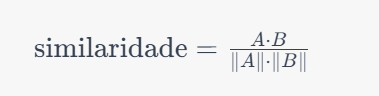
<br>
Na aplicação de NLP, os vetores geralmente representam documentos, palavras ou frases em um espaço vetorial, como por meio de técnicas de incorporação de palavras (word embeddings) como o Word2Vec ou o GloVe. Ao calcular a similaridade de cosseno entre dois vetores de palavras ou documentos, é possível avaliar a proximidade semântica entre eles.

Por exemplo, na análise de texto, se você tiver vetores de incorporação para as palavras "gato" e "cachorro", um alto valor de similaridade de cosseno entre esses vetores indicaria que as palavras são semanticamente semelhantes. Isso é usado em tarefas como recuperação de informações, agrupamento de texto, recomendação de conteúdo e muito mais, onde a comparação semântica é importante.








### Similaridade em pares

Essa etapa tem o objetivo de converter os dados dos textos em uma matriz de contagem de tokens. Para isso, precisamo criar uma matriz esparsa que representa a contagem de cada token do texto. Logo após, é necessário que essa matriz esparsa seja transformada em uma matriz densa. Nessa matriz, cada coluna representa um token e cada linha representa um documento com as contagens de tokens.
Em seguida, é criado o dataFrame original que contém as informações dos textos originais.Dessa forma, para finalizar é feito um "merge" para a criação de um dataFrame que possui as informações dos textos originais e as informações da contagem dos tokens.

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(resultados)

In [ ]:
import pandas as pd
df_processed = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
df_original = pd.DataFrame({"Texto":textos})

In [ ]:
df_processed.reset_index(drop=True, inplace=True)

In [ ]:
combined_df = pd.merge(df_original, df_processed, left_index=True, right_index=True)

In [ ]:
print(df_processed)

   06  10  11  13  14  15  170  2023  2028  2030  ...  york  z16  água  áreas  \
0   1   2   1   2   2   1    1     1     1     1  ...     1    1     1      1   

   éticas  índia  índice  óleo  órgãos  último  
0       1      1       1     1       1       1  

[1 rows x 545 columns]


In [ ]:
print(combined_df)

                                               Texto  06  10  11  13  14  15  \
0  \n51% dos executivos de dados do Brasil aposta...   1   2   1   2   2   1   

   170  2023  2028  ...  york  z16  água  áreas  éticas  índia  índice  óleo  \
0    1     1     1  ...     1    1     1      1       1      1       1     1   

   órgãos  último  
0       1       1  

[1 rows x 546 columns]
